# NLP
- Common NLP Tasks
    - Classify the text
    - Classify each word
        - parts of speach tagging
        - NER
    - Generating Text content
        - complete the text
        - fill the masked words
    - Extracting answers from text
    - Generating new sentence from an input text
        - translation
        - summarization

In [8]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')
classifier(
    ['I am a data science professional.',
     'I hate this so much.',
     'The replay is very positive from the authories']
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9981794357299805},
 {'label': 'NEGATIVE', 'score': 0.9995205402374268},
 {'label': 'POSITIVE', 'score': 0.9998185038566589}]

## Some available pipelines
- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

## Zero-short classification
- classify the text into one of the given class

In [10]:
classifier = pipeline('zero-shot-classification')
classifier(
    'This is a cousre about the Transformer library',
    candidate_labels = ['education', 'politics', 'business']
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a cousre about the Transformer library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.4990500509738922, 0.354718953371048, 0.14623096585273743]}

In [ ]:
# text generation
generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

## using model from Hub

- earlier example uses the default model
- can use a particular model from model hub
- model hub: https://huggingface.co/models
- let's try distilgpt2 model 

```
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)
```


### inference API
- models can be tested directly through browser using inference API

## Mask filling
```
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)
```

### output

```
[{'sequence': 'This course will teach you all about mathematical models.',
  'score': 0.19619831442832947,
  'token': 30412,
  'token_str': ' mathematical'},
 {'sequence': 'This course will teach you all about computational models.',
  'score': 0.04052725434303284,
  'token': 38163,
  'token_str': ' computational'}]
```

## NER
```
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")
```
- grouped_entities = True to group the part that are part of same entity
- eg: Hugging Face

- output
```
[{'entity_group': 'PER', 'score': 0.99816, 'word': 'Sylvain', 'start': 11, 'end': 18}, 
 {'entity_group': 'ORG', 'score': 0.97960, 'word': 'Hugging Face', 'start': 33, 'end': 45}, 
 {'entity_group': 'LOC', 'score': 0.99321, 'word': 'Brooklyn', 'start': 49, 'end': 57}
]
```

# Transformer Models
- GPT-like (auto regressive)
- BERT-like (auto encoding)
- BART/T5-like (sequence to sequence)

## History
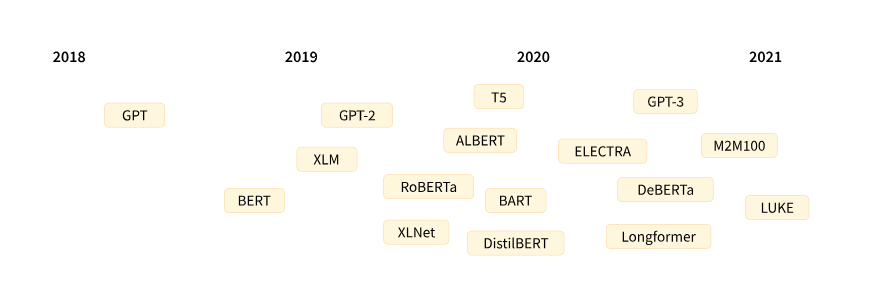

- Large language models
    - pre-trained (self supervised learning)
        - next word prediction
        - masked word prediction -> Flan
        
## Large carbon footprint
- transfer learning: rather than train a model from scratch use a base model and train the classifier

## Transformer architecture
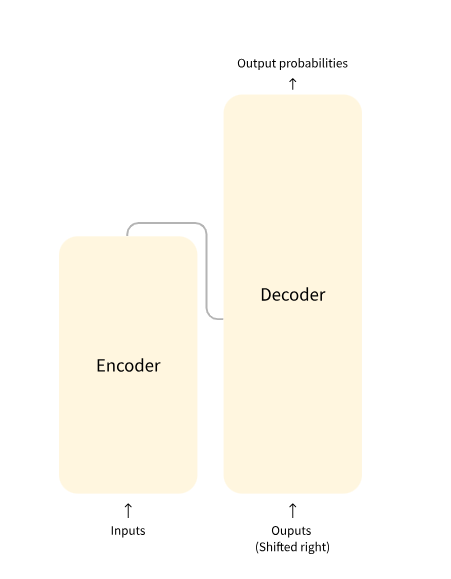

- Encoder only models
    - good for understanding of input
    - classification and named entity recognition
- Decoder only models
    - general tasks like text generation
- Encoder-Decoder models (sequence to sequence models)
    - generative tasks
    - translation & summarization
    
## the original transformer architecture
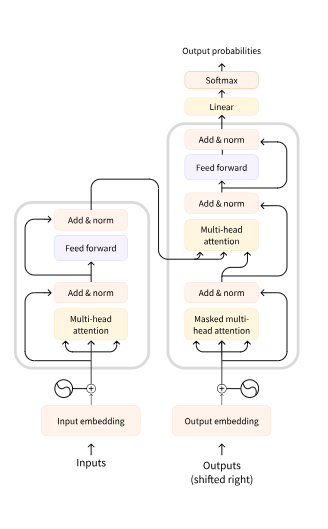

- in decoder, the first attention layer pays attention to the input to the decoder
- the second attention layer uses the output of the encoder

## Architecture vs Checkpoints
- Architecture: the skelton of the model - defenition of each layer and operation that happened in the model
- Checkpoint: the weights that loaded into the model
- for example: BERT is an architecture while bert-base-case is a check point

# Bias and limitations
- the pretrained models has some limitations

In [5]:
from transformers import pipeline

unmasker = pipeline('fill-mask', model='bert-base-uncased')
result = unmasker('This man works as a [MASK].')
print([r['token_str'] for r in result])

result = unmasker('This woman works as a [MASK].')
print([r['token_str'] for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']
['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


- models are gender biased
- the model is trained on web scrapped data
- may complete with sexist, racist or homophobic content

## Summary
- `pipeline()` function

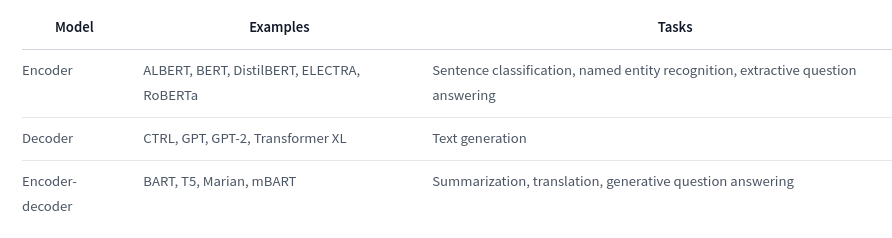